In [1]:
import numpy
import pandas

import turbo
import rul_dataframe
import preprocessing
import plots
import matplotlib.pyplot as plt
import rul_dataframe as rd

In [272]:
tr, te, rl = turbo.getTFDataset()
turbo.addTFlinear(tr, te, rl)
train_tsdf = rd.RUL_DataFrame(df = tr, label_cols = ['linear'])
test_tsdf = rd.RUL_DataFrame(df = te, label_cols = ['linear'])

pr = preprocessing.Preprocessing()

In [3]:
pr.scale(train_tsdf)

In [275]:
plt_tr = plots.Plots(rul_df = train_tsdf)

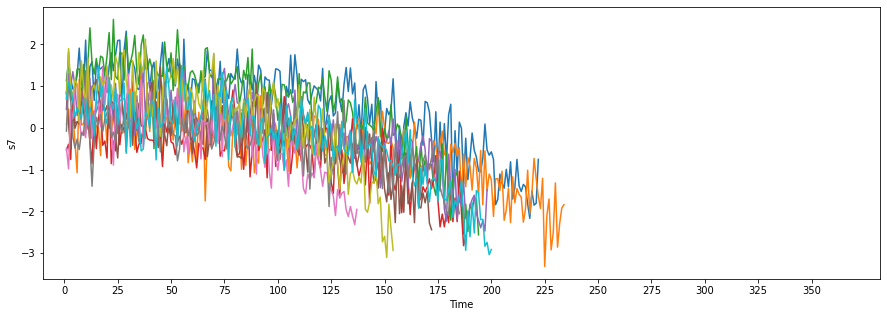

In [5]:
plt_tr.timeplot_column('s7')

In [6]:
pr.fourier_denoise_clumns(rul_df=train_tsdf, psd_threshold=5, cols=['s7'])

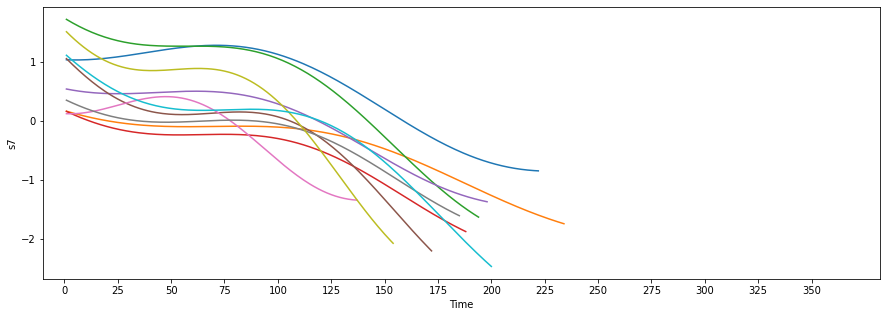

In [7]:
plt_tr.timeplot_column('s7')

In [6]:
train_tsdf.df['s7']

0        554.986328
1        554.970130
2        554.953932
3        554.937734
4        554.921536
            ...    
20626    551.616550
20627    551.600550
20628    551.584550
20629    551.568550
20630    551.552550
Name: s7, Length: 20631, dtype: float64

In [42]:
x = numpy.asarray(train_tsdf.df['s20'])

In [43]:
train_tsdf.df['s20'] = x

In [9]:
pf = PolynomialFeatures()

In [19]:
pf.fit_transform(rul_df.df[rul_df.data_cols]).shape

(20631, 253)

In [63]:
import dcor

In [82]:
res = dcor.distance_correlation(train_tsdf.df['s1'], train_tsdf.df['linear'].astype(float))

In [98]:
def linear(rul_df) :
    # add linear label    
    reverse_column = lambda c: c[::-1]
    rul_df.df['linear'] = rul_df.df[[rul_df.id_col, rul_df.time_col]].groupby(rul_df.id_col).transform(reverse_column) - rul_df.time_0
    rul_df.label_cols.append('linear')

In [99]:
linear(train_tsdf)

In [166]:
def FirstLastScaler(rul_df, col):
    # scaling for labels 1 -> 0
    fl_scaler = lambda col: ((col - col.iloc[-1]) / (col.iloc[0] - col.iloc[-1]))
    rul_df.df[col] = rul_df.df[[rul_df.id_col, col]].groupby(rul_df.id_col).transform(fl_scaler)

In [202]:
a = train_tsdf.df.loc[train_tsdf.df[train_tsdf.id_col] == 2, ['s1','s2']].tail(1)

In [214]:
list(a[['s1','s2']].values[0])

[518.67, 643.85]

In [268]:
def descriptive(rul_df, cols):
    rul_df.df['descriptive'] = rul_df.df[rul_df.id_col] # placeholder
    failing_values = []
    for i in rul_df.df[rul_df.id_col].unique():
        temp = rul_df.df.loc[rul_df.df[rul_df.id_col] == i, cols].tail(1)
        failing_values.append(list(temp.values[0]))
    failing_values = numpy.asarray(failing_values)
    failing_values = failing_values.mean(axis=0)
    for i in range(rul_df.df.index.stop):
        temp = rul_df.df.loc[i, cols].values - failing_values
        rul_df.df.loc[i,'descriptive'] = (temp**2).sum()**(0.5)

In [277]:
descriptive(train_tsdf, ['s2','s3','s4','s7','s11','s12','s15'])

(7,)
20630


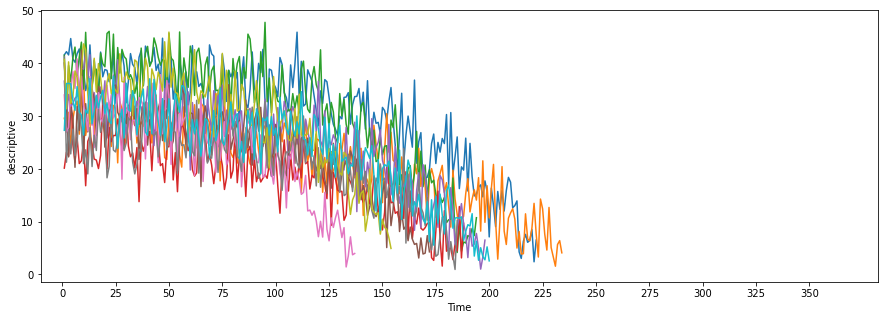

In [278]:
plt_tr.timeplot_column('descriptive')